In [14]:
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import os
from sklearn.preprocessing import StandardScaler
os.environ["OMP_NUM_THREADS"] = "1"

In [4]:
file_path = "C:/Users/Ramiksha C Shetty/Desktop/ml_02/Mall_Customers.csv"  
df = pd.read_csv(file_path)

In [5]:
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [6]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

C:\Users\Ramiksha C Shetty\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ramiksha C Shetty\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [12]:
df['Cluster'] = kmeans.labels_

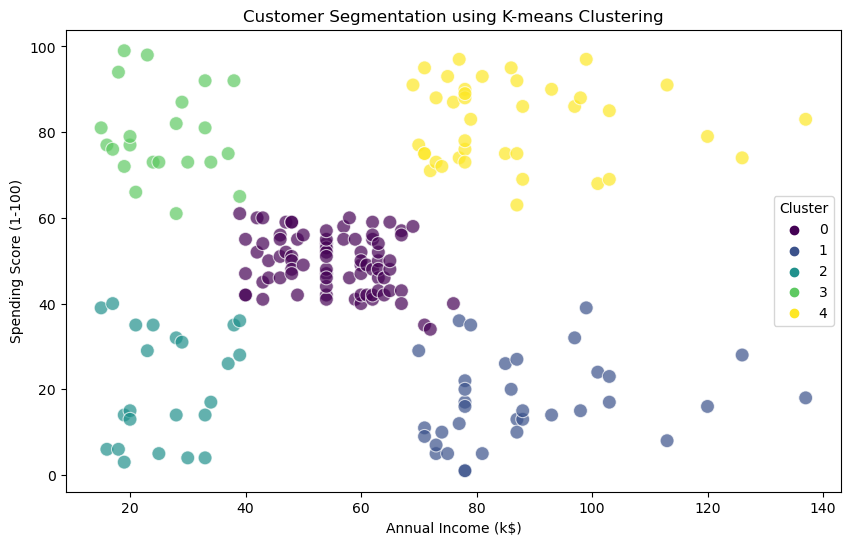

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segmentation using K-means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [15]:
model_file_path = "C:/Users/Ramiksha C Shetty/Desktop/ml_02/kmeans_model.pkl"
joblib.dump(kmeans, model_file_path)
print(f'Model saved to {model_file_path}')

Model saved to C:/Users/Ramiksha C Shetty/Desktop/ml_02/kmeans_model.pkl


In [ ]:

output_file_path = "C:/Users\Ramiksha C Shetty\Desktop\ml_02"clustered_customers.csv'
df.to_csv(output_file_path, index=False)
print(f'Clustered data saved to {output_file_path}')
